<div style='text-align:center'><h1>Statistics Basic</h1></div>

<div style='text-align:right'><h3>Axect</h3></div>

## 1. Numpy : Make Array & Basic Statistics 

* ** 예지의 유치원 받아쓰기 성적 **
    > * 1회 : 100
    > * 2회 : 80
    > * 3회 : 90
    > * 4회 : 95
    > * 5회 : 30

### 1) Make Array 

In [1]:
import numpy as np

In [2]:
score = np.array([100, 80, 90, 95, 30])

### 2) Mean & Std 

In [3]:
m = score.mean()
sig = score.std()
print('평균: ', m, ',' ,  '표준편차: ', sig)

평균:  79.0 , 표준편차:  25.3771550809


### 3) Maximum & Minimum

In [4]:
score_max = score.max()
score_min = score.min()
print('최댓값 : ', score_max, ', ', '최솟값: ', score_min)

최댓값 :  100 ,  최솟값:  30


## 2. Matplotlib : 그래프 그리기 

### 1) 꺾은 선 그래프

In [5]:
import matplotlib.pyplot as plt

In [6]:
X = np.array([i for i in range(1,6)]); print(X)

[1 2 3 4 5]


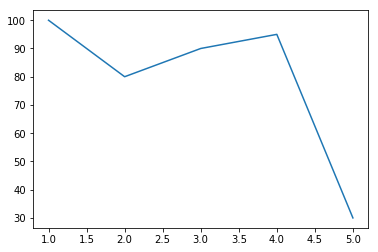

In [7]:
plt.plot(X, score)
plt.show()

In [8]:
X_name = np.array(['First', 'Second', 'Third', 'Fourth', 'Fifth'])

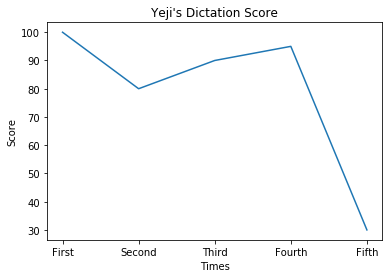

In [9]:
plt.plot(X, score)
plt.title("Yeji's Dictation Score")
plt.xticks(X, X_name)
plt.xlabel('Times')
plt.ylabel('Score')
plt.show()

### 2) 점 그래프

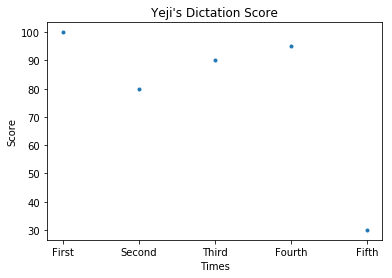

In [10]:
plt.plot(X, score, '.') # o, >, * , ,
plt.title("Yeji's Dictation Score")
plt.xticks(X, X_name)
plt.xlabel('Times')
plt.ylabel('Score')
plt.show()

### 3) 막대 그래프 

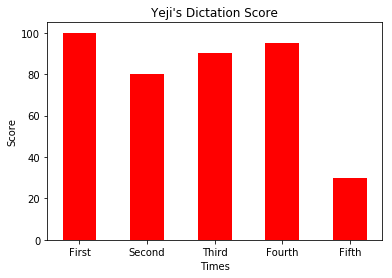

In [11]:
plt.bar(X, score, color='r', width=0.5)
plt.title("Yeji's Dictation Score")
plt.xticks(X, X_name)
plt.xlabel('Times')
plt.ylabel('Score')
plt.show()

<div style='text-align:center'><h1>Advanced Statistics</h1></div> 

## 1. Polyfit : 다항함수로 근사 

### 1) 치킨 가격 예측 

<p style="text-align:center"> 치킨은 서민 음식으로 널리 알려져 있지만 최근 가격이 지속적으로 인상되고 있습니다. <br>
대략적인 인상 경향은 매년 평균 500원 정도 입니다. 2001년도 치킨 가격은 10000원이었습니다. 2022년의 치킨 가격은 얼마가 될까요? </p>

#### 1-1) 데이터 생성

In [12]:
from random import uniform # 정규분포스럽게 난수 생성

$$ y = m ( x - a ) + b $$

In [13]:
def chicken(year):
    return 500 * (year - 2001) + 10000

In [14]:
price = np.array([chicken(i + 2001) + uniform(-1000, 1000) for i in range(17)]); print(price)

[ 10496.10226798  10513.89183559  10390.2659039   11781.21104777
  12468.82472694  12706.6437364   12255.75177927  13975.69013169
  14767.98000222  13539.63435747  15368.61488688  15911.71815035
  15270.47130612  15513.7676877   17296.90228916  16757.54088582
  18165.206359  ]


#### 1-2) 시각화 하기

In [15]:
year = [i + 2001 for i in range(17)]; print(year)

[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


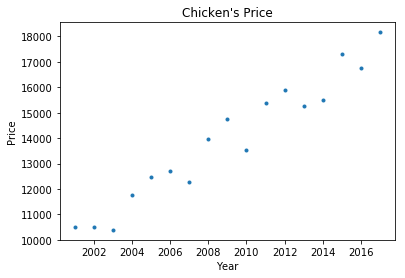

In [16]:
plt.plot(year, price, '.')
plt.title("Chicken's Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### 1-3) 1차 근사

In [17]:
fit1 = np.polyfit(year, price, 1) # 마지막 숫자는 차수를 의미.
print(fit1)

[  4.70030533e+02  -9.30339564e+05]


$$ y = ax + b $$

In [18]:
func1 = np.poly1d(fit1)

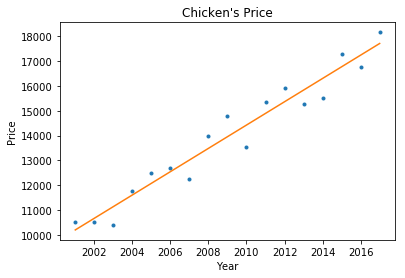

In [19]:
plt.plot(year, price, '.')
plt.plot(year, func1(year))
plt.title("Chicken's Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

* 2022년의 치킨 값 :

In [20]:
func1(2022)

20062.174424455967

#### 1-4) 2차 근사 

In [21]:
fit2 = np.polyfit(year, price, 2); print(fit2)

[ -4.10468657e-01   2.11929360e+03  -2.58701446e+06]


In [22]:
func2 = np.poly1d(fit2)

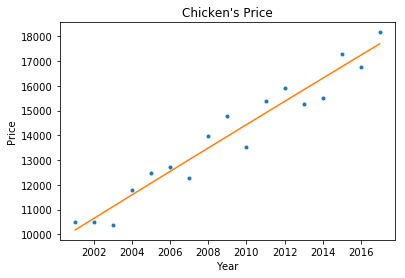

In [23]:
plt.plot(year, price, '.')
plt.plot(year, func2(year))
plt.title("Chicken's Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

* 2022년의 치킨 값:

In [24]:
func2(2022)

20002.656469243579

* 최대 치킨 값은?

In [25]:
chick_list = np.array([func2(i) for i in range(2001, 2151)]);
chick_max = chick_list.max();
print(chick_max)

72075.4065734


In [26]:
def FindMax(X):
    for i, price in enumerate(X):
        if price == X.max():
            return(i)
            break

In [27]:
a = FindMax(chick_list)

In [28]:
print(2001 + a)

2150


In [29]:
year2 = np.array([i + 2001 for i in range(150)])
price2 = func2(year2)

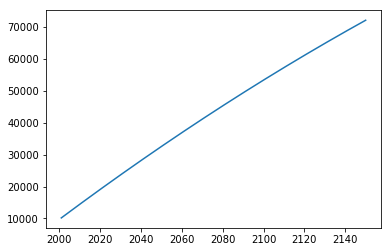

In [30]:
plt.plot(year2, price2)
plt.show()

####  1-5) 3차 근사

In [31]:
fit3 = np.polyfit(year, price, 3)
print(fit3)

[  5.06317549e-01  -3.05198633e+03   6.13271344e+06  -4.10801240e+09]


In [32]:
func3 = np.poly1d(fit3)

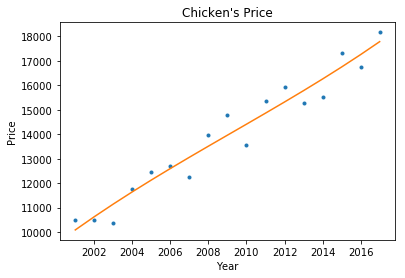

In [33]:
plt.plot(year, price, '.')
plt.plot(year, func3(year))
plt.title("Chicken's Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

* 2022년 치킨값:

In [34]:
func3(2022)

20832.004613399506

## Test: 최저임금 추정

<img src="http://www.minimumwage.go.kr/images/common/t1_01_grp.jpg"></img>

### Q. 2018년의 최저임금은 얼마일까요? 

In [35]:
cost = np.array([4000, 4110, 4320, 4580, 4860, 5210, 5580, 6030, 6470])
year = np.array([i for i in range(2009, 2018)])
print(cost)

[4000 4110 4320 4580 4860 5210 5580 6030 6470]


#### 1) 1차 근사 

In [36]:
fit_a = np.polyfit(year, cost, 1); print(fit_a)

[  3.13166667e+02  -6.25386722e+05]


In [37]:
func_a = np.poly1d(fit_a)

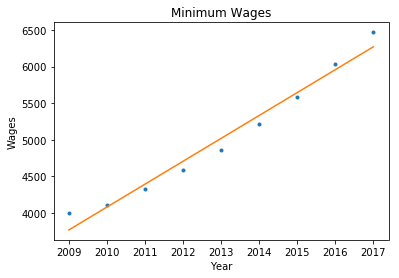

In [38]:
plt.plot(year, cost, '.')
plt.plot(year, func_a(year))
plt.title('Minimum Wages')
plt.xlabel('Year')
plt.ylabel('Wages')
plt.show()

* 2018년의 최저임금 (1차 추정):

In [39]:
func_a(2018)

6583.611111111124

####  1-2) 2차 근사

In [40]:
fit_b = np.polyfit(year, cost, 2);print(fit_b)

[  2.30627706e+01  -9.25375476e+04   9.28287034e+07]


In [41]:
func_b = np.poly1d(fit_b)

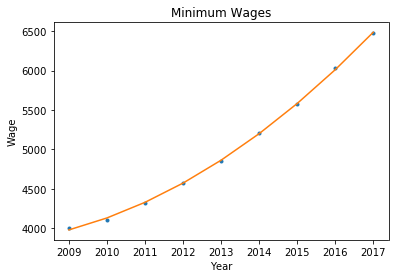

In [42]:
plt.plot(year, cost, '.')
plt.plot(year, func_b(year))
plt.title('Minimum Wages')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.show()

* 2018년 최저임금 (2차 추정) :

In [43]:
func_b(2018)

7006.4285714030266

* 최저임금 10000원 시대

In [44]:
def FindTT(X):
    for i, value in enumerate(X):
        if value > 10000:
            return i
            break

In [45]:
TT = np.array([func_b(i) for i in range(2001, 2050)]);
V = FindTT(TT); print(V + 2001)

2023


####  1-3) 3차 근사

In [46]:
fit_c = np.polyfit(year, cost, 3); print(fit_c)

[ -7.65993182e-01   4.64889560e+03  -9.40432999e+06   6.34102930e+09]


In [47]:
func_c = np.poly1d(fit_c)

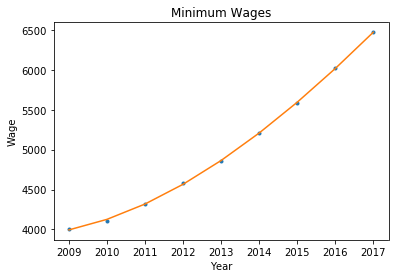

In [48]:
plt.plot(year, cost, '.')
plt.plot(year, func_c(year))
plt.title('Minimum Wages')
plt.xlabel('Year')
plt.ylabel('Wage')
plt.show()

* 2018년 최저임금 (3차 추정) :

In [49]:
func_c(2018)

6955.873028755188